In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

In [22]:
cifar10 = tf.keras.datasets.cifar10  # Carrega o conjunto de dados 

(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

x_train, x_test = x_train / 255.0, x_test / 255.0  # Normaliza as imagens dividindo por 255, para que os valores de pixels fiquem entre 0 e 1
y_train, y_test = y_train.flatten(), y_test.flatten()  # Achata os arrays de rótulos (eles têm formato (N, 1)) para (N,)

print("x_train.shape: ", x_train.shape)  
print("y_train.shape: ", y_train.shape)  


x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [23]:
K = len(set(y_train))
print("numero de classes: ", K)

numero de classes:  10


In [30]:
i = Input(shape=x_train[0].shape)  # Entrada com shape das imagens (28, 28, 1) ou (32, 32, 3) dependendo do seu dataset
x = Conv2D(32, (3, 3), activation='relu', padding="same")(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding="same")(x)
x = MaxPooling2D((2, 2))(x)  # Corrigido para MaxPooling2D
x = Conv2D(64, (3, 3), activation='relu', padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)  # Corrigido para MaxPooling2D
x = Conv2D(128, (3, 3), activation='relu', padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)  # Corrigido para MaxPooling2D

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

# Criar o modelo
model = Model(i, x)

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.4659 - loss: 1.6898 - val_accuracy: 0.6334 - val_loss: 1.0690
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.6987 - loss: 0.8674 - val_accuracy: 0.7409 - val_loss: 0.7580
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.7598 - loss: 0.6898 - val_accuracy: 0.7230 - val_loss: 0.8472
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 68ms/step - accuracy: 0.7984 - loss: 0.5804 - val_accuracy: 0.7233 - val_loss: 0.8648
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.8304 - loss: 0.4864 - val_accuracy: 0.7362 - val_loss: 0.8436
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.8593 - loss: 0.4037 - val_accuracy: 0.7997 - val_loss: 0.6019
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 67ms/step - accuracy: 0.8823 - loss: 0.3344 - val_accuracy: 0.8057 - val_loss: 0.6201
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 69ms/step - accuracy: 0.

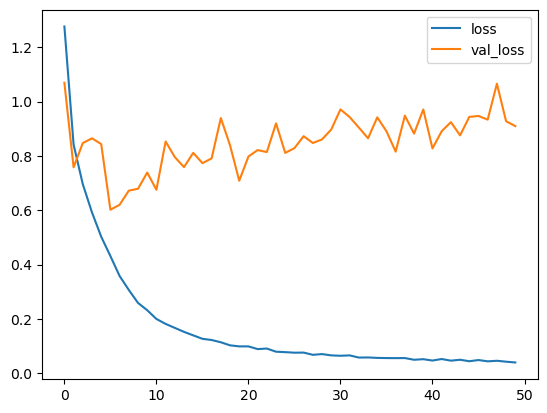

In [ ]:
plt.plot(r.history["loss"], label="loss")  # Plota a curva de perda de treinamento usando os valores armazenados em r.history["loss"]
plt.plot(r.history["val_loss"], label="val_loss")  # Plota a curva de perda de validação usando os valores armazenados em r.history["val_loss"]
plt.legend()  

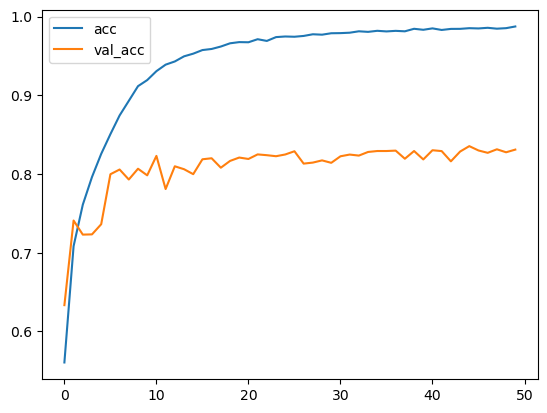

In [ ]:
plt.plot(r.history["accuracy"], label="acc")  # Plota a curva de acurácia de treinamento usando os valores armazenados em r.history["accuracy"]
plt.plot(r.history["val_accuracy"], label="val_acc")  # Plota a curva de acurácia de validação usando os valores armazenados em r.history["val_accuracy"]
plt.legend()  

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Confusion matrix, without normalization
[[869   9  38  12   4   4   3   8  38  15]
 [  7 929   4   3   1   0   2   1  15  38]
 [ 40   3 799  23  43  34  39  11   6   2]
 [ 24  10  87 623  43 115  47  24  13  14]
 [  7   3  79  38 783  16  28  38   5   3]
 [ 10   3  61  80  30 757  11  36   6   6]
 [  4   6  46  28  12  10 877   9   7   1]
 [ 11   1  24  24  27  30   5 871   2   5]
 [ 38  10  12   4   2   0   3   2 921   8]
 [ 23  49  10   4   1   1   3   6  22 881]]


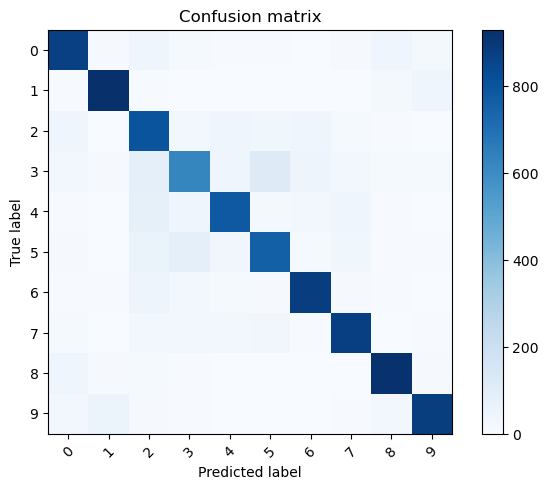

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normaliza a matriz dividindo cada linha pela soma
        print("Normalized confusion matrix")  # Informa que a matriz foi normalizada
    else:
        print('Confusion matrix, without normalization')  # Informa que a matriz não foi normalizada

    print(cm)  # Exibe a matriz de confusão no terminal

    plt.imshow(cm, interpolation='nearest', cmap=cmap)  # Plota a matriz de confusão com a cor definida por cmap
    plt.title(title)  # Define o título do gráfico
    plt.colorbar()  # Adiciona a barra de cores ao lado da matriz
    tick_marks = np.arange(len(classes))  # Cria os ticks para as classes no eixo x e y
    plt.xticks(tick_marks, classes, rotation=45)  # Rotaciona e define os rótulos do eixo x
    plt.yticks(tick_marks, classes)  # Define os rótulos do eixo y

    plt.tight_layout()  # Ajusta o layout do gráfico para não cortar nada
    plt.ylabel('True label')  # Rótulo do eixo y (rótulos reais)
    plt.xlabel('Predicted label')  # Rótulo do eixo x (rótulos previstos)
    plt.show()  # Exibe o gráfico

p_test = model.predict(x_test).argmax(axis=1)  # Realiza as previsões do modelo e escolhe a classe com maior probabilidade
cm = confusion_matrix(y_test, p_test)  # Cria a matriz de confusão comparando as previsões com os valores reais
plot_confusion_matrix(cm, list(range(10)))  # Plota a matriz de confusão para as 10 classes (presumivelmente de 0 a 9)


In [ ]:
labels = [
    "airplane", "automobile", "bird", "cat", "deer", "dog", 
    "frog", "horse", "ship", "truck"
] 

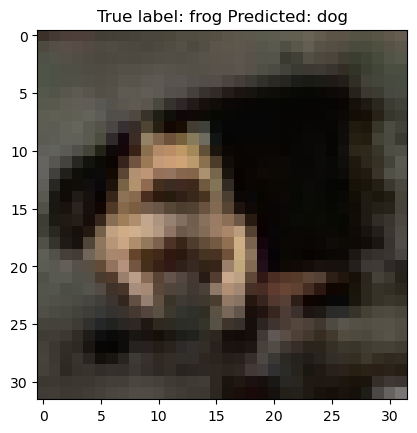

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]  # Encontra os índices onde as previsões (p_test) são diferentes dos rótulos reais (y_test)
i = np.random.choice(misclassified_idx)  # Escolhe aleatoriamente um dos índices onde a previsão foi incorreta
plt.imshow(x_test[i], cmap="gray")  # Plota a imagem do teste com índice 'i', em escala de cinza
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))  # Define o título do gráfico com o rótulo verdadeiro e o previsto, acessando as classes a partir da lista 'labels'
plt.show()  # Exibe o gráfico


In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,078,336 (27.00 MB)

 Trainable params: 2,359,210 (9.00 MB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 4,718,422 (18.00 MB)